In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

In [52]:
call_data = pd.read_csv('911.csv')
call_data.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


### 1) What are the top 5 zipcodes for 911 calls?

In [53]:
pd.value_counts(call_data['zip'].values,ascending=False).head()

19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
dtype: int64

In [54]:
call_data.insert(5,'Reason','')
call_data['Reason'] = call_data['title'].apply(lambda x : x.split(':')[1])
call_data.insert(5,'Department','')
call_data['Department'] = call_data['title'].apply(lambda x : x.split(':')[0])
call_data.head()

,lat,lng,desc,zip,title,Department,Reason,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,EMS,BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,EMS,DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,Fire,GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,EMS,CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,EMS,DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


### 3) What is the most common Reason for a 911 call based off of this new column?

In [55]:
value = pd.value_counts(call_data['Reason'].values,ascending=False)
value

 VEHICLE ACCIDENT -       23066
 DISABLED VEHICLE -        7702
 VEHICLE ACCIDENT          5573
 FIRE ALARM                5510
 RESPIRATORY EMERGENCY     5112
                          ...  
 WARRANT SERVICE              2
 SUSPICIOUS                   2
 ACTIVE SHOOTER               2
 BOMB DEVICE FOUND            1
 DISABLED VEHICLE             1
Length: 81, dtype: int64

### 4) Now use seaborn to create a countplot of 911 calls by Reason

In [56]:
import seaborn as sns

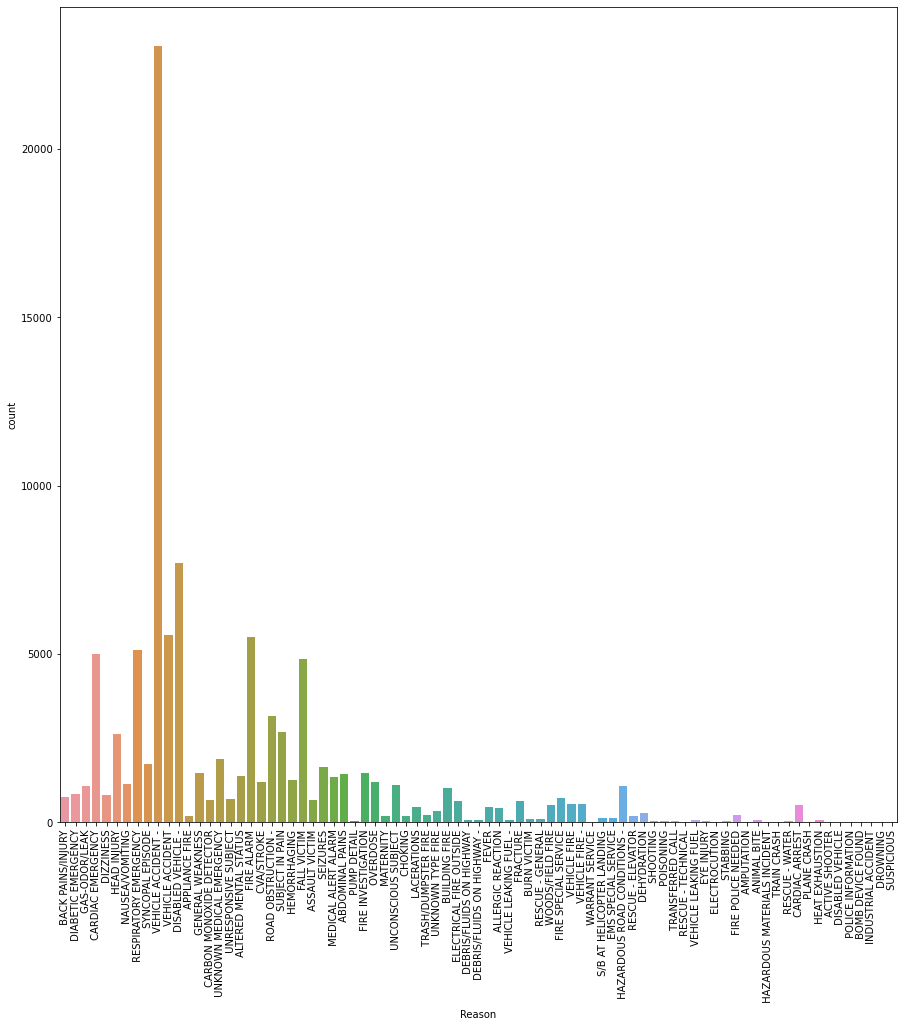

In [57]:
fig , ax = plt.subplots(figsize=(15,15))
#ax(sns.countplot(x=call_data['Reason'])) 
ax1 = sns.countplot(x=call_data['Reason'],ax=ax)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90);


### 5) What is the data type of the objects in the timeStamp column?

In [58]:
type(call_data['timeStamp'][0])

str

### 6) You should have seen that these timestamps are still strings. Use pd.to_datetime to convert the column from strings to DateTime objects.

In [59]:
call_data['timeStamp']=pd.to_datetime(call_data['timeStamp'])

In [60]:
call_data['timeStamp']

0       2015-12-10 17:40:00
1       2015-12-10 17:40:00
2       2015-12-10 17:40:00
3       2015-12-10 17:40:01
4       2015-12-10 17:40:01
                ...        
99487   2016-08-24 11:06:00
99488   2016-08-24 11:07:02
99489   2016-08-24 11:12:00
99490   2016-08-24 11:17:01
99491   2016-08-24 11:17:02
Name: timeStamp, Length: 99492, dtype: datetime64[ns]

### 7) You can now grab specific attributes from a Datetime object by calling them. 

In [61]:
time = call_data['timeStamp'].iloc[0]
time.hour

17

In [62]:
day = call_data['timeStamp'].iloc[0]
day.month

12

In [63]:
day = call_data['timeStamp'].iloc[0]
day.weekday()


3

In [64]:
call_data.insert(8,'Hour','')
call_data.insert(9,'Month','')
call_data.insert(10,'Day of Week','')


In [65]:
call_data['Hour'] = call_data['timeStamp'].apply(lambda x : x.hour)
call_data['Month'] = call_data['timeStamp'].apply(lambda x : x.month)
call_data['Day of Week'] = call_data['timeStamp'].apply(lambda x : x.weekday())
call_data.head()

,lat,lng,desc,zip,title,Department,Reason,timeStamp,Hour,Month,Day of Week,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,EMS,BACK PAINS/INJURY,2015-12-10 17:40:00,17,12,3,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,EMS,DIABETIC EMERGENCY,2015-12-10 17:40:00,17,12,3,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,Fire,GAS-ODOR/LEAK,2015-12-10 17:40:00,17,12,3,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,EMS,CARDIAC EMERGENCY,2015-12-10 17:40:01,17,12,3,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,EMS,DIZZINESS,2015-12-10 17:40:01,17,12,3,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


### 8) Notice how the Day of Week is an integer 0-6. Use the .map() with this dictionary to map the actual string names to the day of the week:
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}

In [66]:
call_data['Day of Week']=call_data['Day of Week'].map({0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'})

In [67]:
call_data.head()

,lat,lng,desc,zip,title,Department,Reason,timeStamp,Hour,Month,Day of Week,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,EMS,BACK PAINS/INJURY,2015-12-10 17:40:00,17,12,Thu,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,EMS,DIABETIC EMERGENCY,2015-12-10 17:40:00,17,12,Thu,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,Fire,GAS-ODOR/LEAK,2015-12-10 17:40:00,17,12,Thu,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,EMS,CARDIAC EMERGENCY,2015-12-10 17:40:01,17,12,Thu,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,EMS,DIZZINESS,2015-12-10 17:40:01,17,12,Thu,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


### 9) Now use seaborn to create a countplot of the Day of Week column with the hue based off of the Reason column

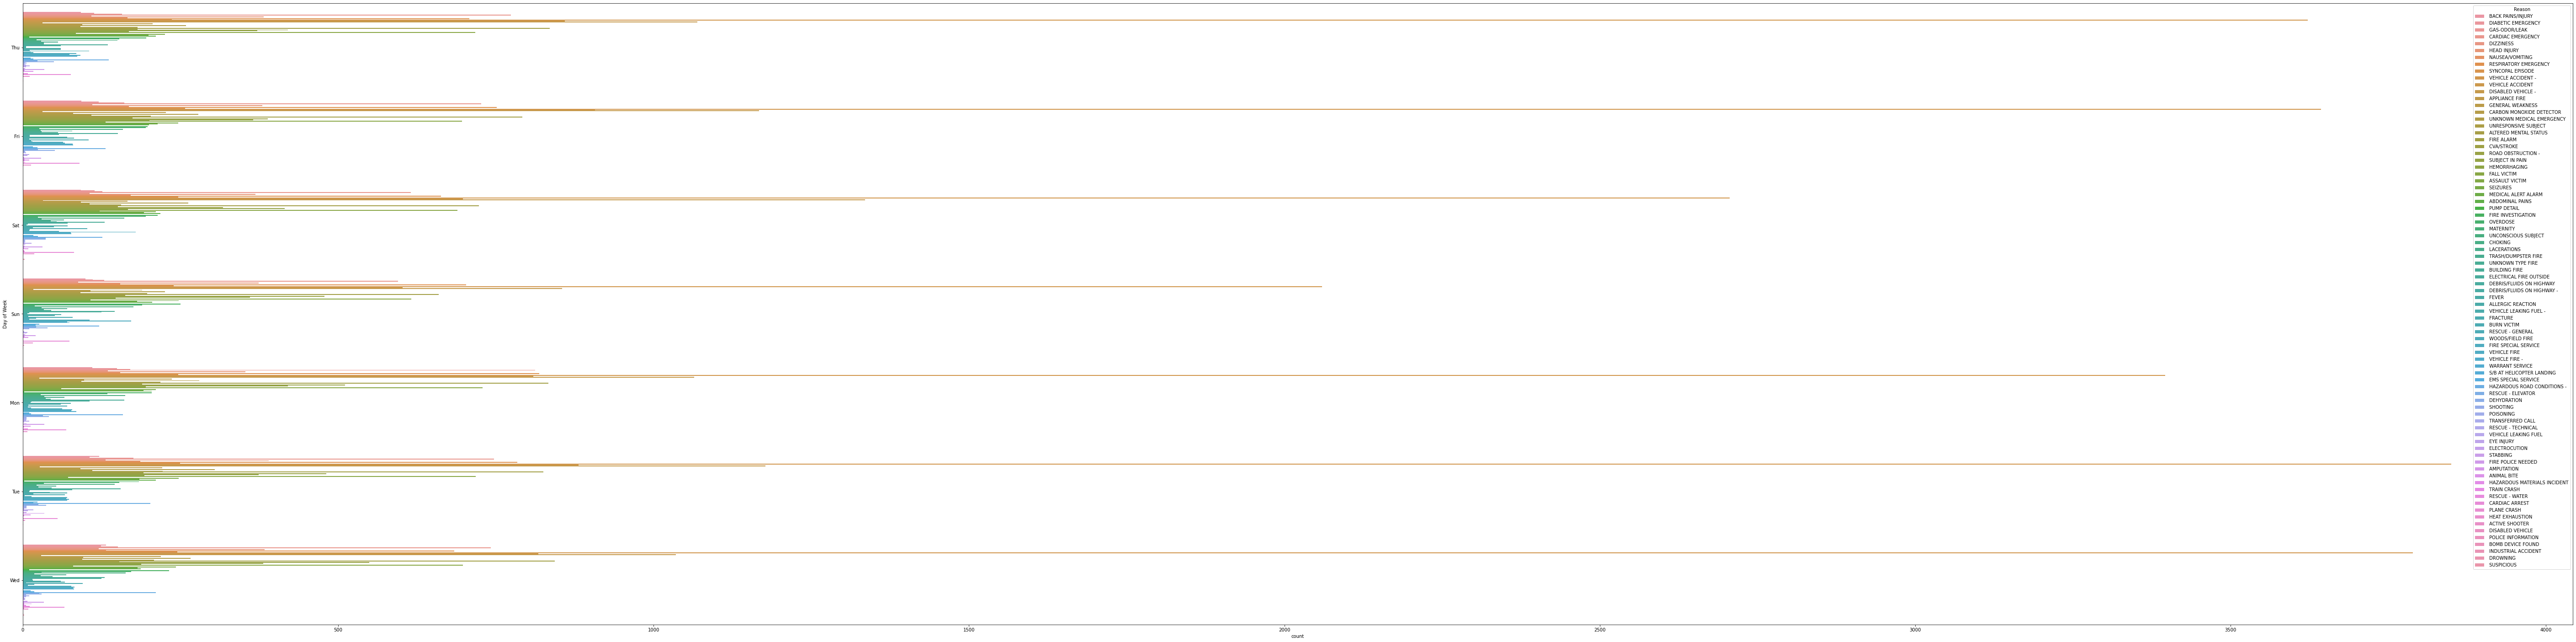

In [68]:
fig , ax = plt.subplots(figsize=(100,25))
ax1 = sns.countplot(y=call_data['Day of Week'],hue=call_data['Reason'],ax=ax)

### 10) You should have noticed it was missing some Months, let's see if we can maybe fill in this information by plotting the information in another way, possibly a simple line plot that fills in the missing months, in order to do this, we'll need to do some work with pandas.
Now create a gropuby object called byMonth, where you group the DataFrame by the month column and use the count() method for aggregation. Use the head() method on this returned DataFrame

In [88]:
month_count = call_data.groupby('Month').count()
month_count.head()
#pd.value_counts(call_data['Month'].values,ascending=False)

,lat,lng,desc,zip,title,Department,Reason,timeStamp,Date,Hour,Day of Week,twp,addr,e
Month,,,,,,,,,,,,,,
1,13205,13205,13205,11527,13205,13205,13205,13205,13205,13205,13205,13203,13096,13205
2,11467,11467,11467,9930,11467,11467,11467,11467,11467,11467,11467,11465,11396,11467
3,11101,11101,11101,9755,11101,11101,11101,11101,11101,11101,11101,11092,11059,11101
4,11326,11326,11326,9895,11326,11326,11326,11326,11326,11326,11326,11323,11283,11326
5,11423,11423,11423,9946,11423,11423,11423,11423,11423,11423,11423,11420,11378,11423


### 11) Now create a simple plot off of the dataframe indicating the count of calls per month


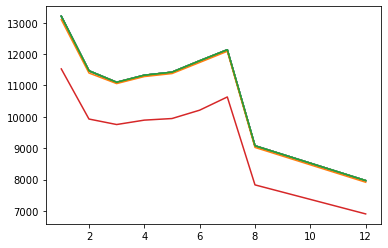

In [70]:
plt.plot(month_count);

### 12) Now see if you can use seaborn's lmplot() to create a linear fit on the number of calls per month. Keep in mind you may need to reset the index to a column.

### 13) Create a new column called 'Date' that contains the date from the timeStamp column. You'll need to use apply along with the .date() method.

In [75]:
#call_data.insert(8,'Date','')
call_data['Date'] = call_data['timeStamp'].apply(lambda x : x.date())
call_data.head()

,lat,lng,desc,zip,title,Department,Reason,timeStamp,Date,Hour,Month,Day of Week,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,EMS,BACK PAINS/INJURY,2015-12-10 17:40:00,2015-12-10,17,12,Thu,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,EMS,DIABETIC EMERGENCY,2015-12-10 17:40:00,2015-12-10,17,12,Thu,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,Fire,GAS-ODOR/LEAK,2015-12-10 17:40:00,2015-12-10,17,12,Thu,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,EMS,CARDIAC EMERGENCY,2015-12-10 17:40:01,2015-12-10,17,12,Thu,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,EMS,DIZZINESS,2015-12-10 17:40:01,2015-12-10,17,12,Thu,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


### 14) Now groupby this Date column with the count() aggregate and create a plot of counts of 911 calls

In [84]:
counts = call_data.groupby('Date').count()
counts.head()
#pd.value_counts(call_data['Date'].values,ascending=False).head()

,lat,lng,desc,zip,title,Department,Reason,timeStamp,Hour,Month,Day of Week,twp,addr,e
Date,,,,,,,,,,,,,,
2015-12-10,115,115,115,100,115,115,115,115,115,115,115,115,113,115
2015-12-11,396,396,396,333,396,396,396,396,396,396,396,395,391,396
2015-12-12,403,403,403,333,403,403,403,403,403,403,403,403,401,403
2015-12-13,319,319,319,280,319,319,319,319,319,319,319,319,317,319
2015-12-14,447,447,447,387,447,447,447,447,447,447,447,446,445,447


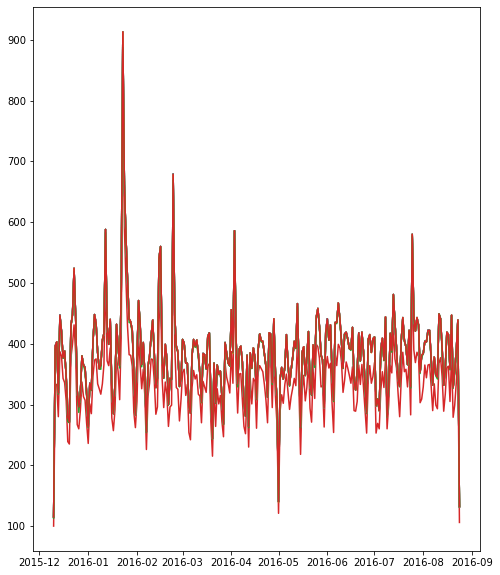

In [99]:
plt.figure(figsize=(8,10))
plt.plot(counts);

### 15) Now recreate this plot but create 3 separate plots with each plot representing a Reason for the 911 call

### 16) Now let's move on to creating heatmaps with seaborn and our data. We'll first need to restructure the dataframe so that the columns become the Hours and the Index becomes the Day of the Week